## Classwork 1
## Introduction to the Tidyverse in R

Note that this notebook relies heavily on material from the textbook [R for Data Science](https://r4ds.had.co.nz/index.html) by Hadley Wickham and Garrett Grolemund, and to a lesser extent, on the [DataCamp course on the Tidyverse](https://www.datacamp.com/courses/introduction-to-the-tidyverse). Both are great resources to explore!

### A. What is the Tidyverse? And how do we install it?

The Tidyverse is a collection of R packages meant to streamline data science tasks. All Tidyverse packages share an underlying design philosophy, grammar, and data structures. In this notebook, we'll learn some basics of the Tidyverse.

In [1]:
install.packages("tidyverse", dependencies = TRUE)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘covr’, ‘feather’, ‘mockr’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### B. Some very basic plotting with ggplot

Let's do some plotting with the mpg dataset. mpg contains observations collected by the US Environmental Protection Agency on 38 models of car.

First, load and learn about the variables contained in this dataset. The dataset is in the ggplot2 package, which is included in the tidyverse. So, you can load the data using data(mpg).

In [2]:
data(mpg)
#help(mpg)
head(mpg)
?mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Let's look at a plot that might tell us about the relationship between drv (whether the car is front, rear, or 4-wheel drive) and hwy (highway miles per gallon).

We begin a plot with the function `ggplot()`, which creates a coordinate system that you can add layers to. Layers are created with `+` `geom_boxplot()` will make a boxplot. In general, a template for creating plots would be

`ggplot(data = DATA) +
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))`

**Below is the basic code for the boxplot (fill in the correct variables).**

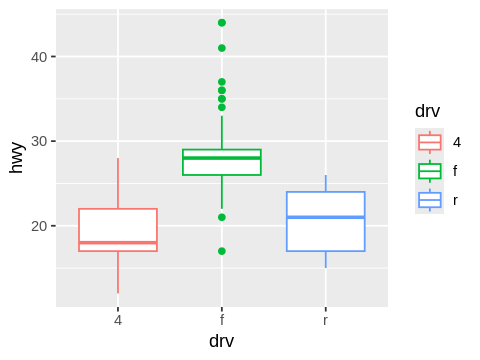

In [3]:
options(repr.plot.width=4, repr.plot.height=3) #this line just changes the size of the boxplots
p = ggplot(data = mpg) +
    geom_boxplot(mapping = aes(x = drv , y = hwy, color = drv))
### (1) Your code here.
p
###

**What do we notice about the relationship?**

- When compared to 4-wheel drive or rear wheel drive, front-wheel is more efficient with respect to highway miles per gallon.


- There are some potential outliers in the front-wheel drive category.


- The 4-wheel drive group has a long/heavy upper tail.

You can mess with *all* sorts of things. For example, you could change colors:

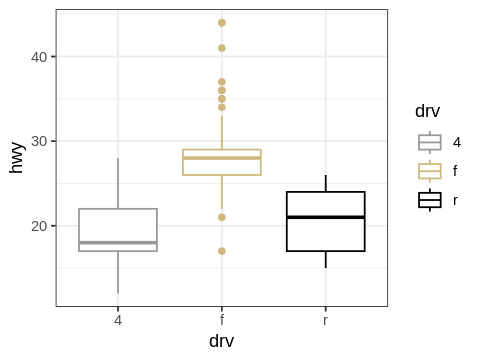

In [4]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = drv, y = hwy, color = drv)) +
    scale_color_manual(values=c("#999999", "#CFB87C", "black"))+
    theme_bw()

In some instances, it is helpful to swap the axes. For example, the levels of the factor along the horizontal axis might have long names. **Try flipping the axes using `coord_flip()`**.

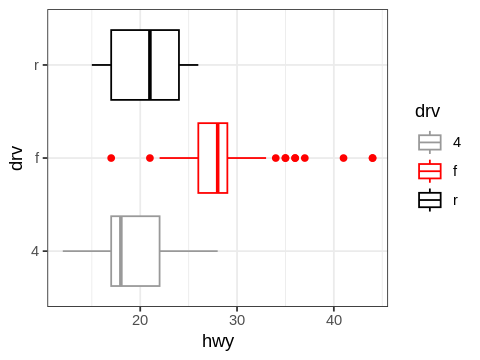

In [5]:
### (2) Your code here
options(repr.plot.width=4, repr.plot.height=3) #this line just changes the size of the boxplots
p = ggplot(data = mpg) +
    geom_boxplot(mapping = aes(x = drv , y = hwy, color = drv)) +
      scale_color_manual(values = c('#999999','red','black')) +
      theme_bw()+
      coord_flip()
### (1) Your code here.
p
###
###

Now let's try a scatterplot. **Use the template above to plot hwy (y) against displ (x).** `geom_point()` will give a scatterplot.

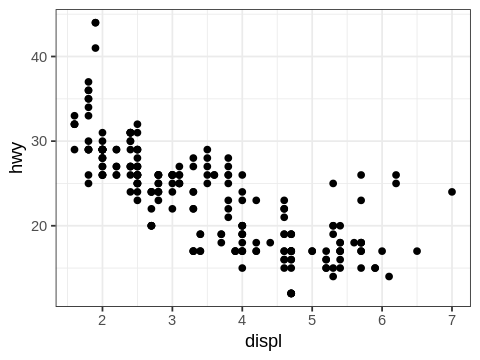

In [6]:
options(repr.plot.width=4, repr.plot.height=3)

p_scatter = ggplot(data = mpg) +
  geom_point(mapping = aes(x=displ,y=hwy))+
  theme_bw()
p_scatter
###

**What do we notice about the relationship between engine displacement and highway miles per gallon?**

There is a downward trend in `hwy` as `displ` increases. The trend appears roughly linear. However, there may be some evidence of curvature at the extremes of `displ`.

**Now, let's color points based on whether they represent a vehicle that is front, rear, or 4-wheel drive (`drv`). We will map the `drv` variable to the *aesthetic* `color`. In general, an aesthetic is a "visual property of the objects in the plot" ([Wickham, Section 3.3](https://r4ds.had.co.nz/index.html)). Other aesthetics include size and shape.**

**Further, use the `scale_color_manual()` function to specify the [CU Boulder Colors](https://www.colorado.edu/brand/how-use/color).**

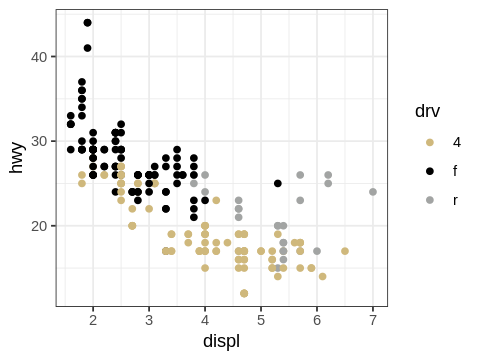

In [7]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, color = drv)) +
    scale_color_manual(values=c("#CFB87C", "#000000", "#A2A4A3")) +
    theme_bw()

**What do we notice about the relationships between these variables?**

Another way to add information from categorical variables to plots is by using *facets*. Facets split a plot into subplots, where each subplot contains data for a particular level of the categorical variable. We can facet by adding `facet_wrap(~ CatVar, nrow = x)` to our ggplot, where `CatVar` is the categorical variable that we want to facet on, and `x` is the number of rows that we'd like (we could also use ncol...).  

**Create a facet plot where you split the data based on the class variable**.

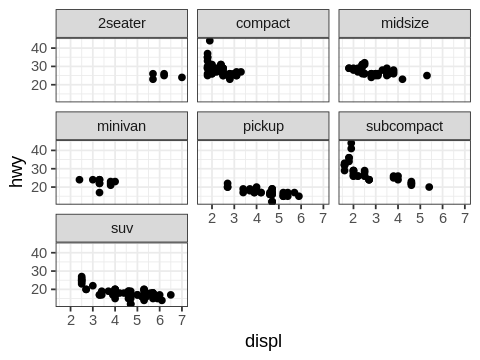

In [8]:
options(repr.plot.width=4, repr.plot.height=3)

### (4) Your code here.
p_facet = ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))+
    facet_wrap(~class,ncol = 3)+ #doing the plots based on the classes
    theme_bw()
p_facet
###

Instead of seeing the individual data points, we might be interested in visualizing some overall trend between displ and hwy. We could do this by substituting `geom_points()` with `geom_smooth()`. **Try it!**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


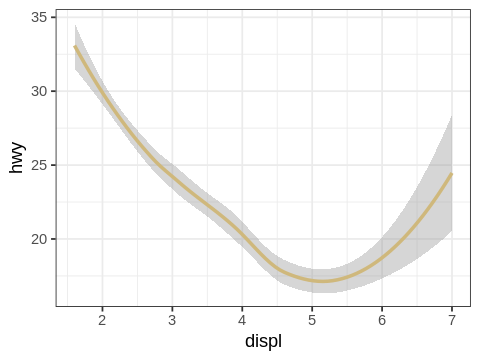

In [9]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy), color = "#CFB87C")+
    theme_bw()

And, we can layer the smooth over the scatterplot pretty easily by adding `+ geom_point()`. **Try it!**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


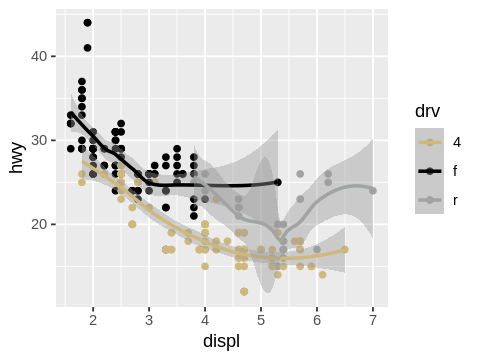

In [10]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = drv))+
    geom_smooth(mapping = aes(x = displ, y = hwy, color = drv)) +
    scale_color_manual(values=c("#CFB87C", "#000000", "#A2A4A3"))

### C. Data Manipulation and Exploration

`dplyr` is a package in the Tidyverse that provides simple “verbs”, or functions, that correspond to the most common data manipulation tasks; these verbs help you translate your thoughts into code. Let's see how some of these verbs work on the gapminder dataset. **First, if you haven't already, let's install and load the gapminder package.**

In [11]:
install.packages("gapminder")
library(gapminder)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Write a summary of the variables in this dataset.**

In [12]:
data(gapminder)
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


**Filter rows with filter()**

It is often useful to study a subset of your data. The verb `filter()` will easily allow you to filter rows (observations) in a data frame. Here's one possibility:

In [18]:
### (5) Your code here.
filter(gapminder,country == 'United States')
###

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
United States,Americas,1952,68.440,157553000,13990.48
United States,Americas,1957,69.490,171984000,14847.13
United States,Americas,1962,70.210,186538000,16173.15
United States,Americas,1967,70.760,198712000,19530.37
United States,Americas,1972,71.340,209896000,21806.04
United States,Americas,1977,73.380,220239000,24072.63
United States,Americas,1982,74.650,232187835,25009.56
United States,Americas,1987,75.020,242803533,29884.35
United States,Americas,1992,76.090,256894189,32003.93


**Has the code above modified the exiting data frame or created a new one?**

Not unless we store `filter(...)` back into `df`!

**Filter the original dataset to show only observations where the year is later than 1987 and the life expectancy is greater than or equal to 70. Save your answer in `gapminder_filter`**

In [13]:
### (6) Your code here.
gapminder_filter = filter(gapminder,year>1987,lifeExp>=70)
###
gapminder_filter

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Albania,Europe,1992,71.581,3326498,2497.438
Albania,Europe,1997,72.950,3428038,3193.055
Albania,Europe,2002,75.651,3508512,4604.212
Albania,Europe,2007,76.423,3600523,5937.030
Algeria,Africa,2002,70.994,31287142,5288.040
Algeria,Africa,2007,72.301,33333216,6223.367
Argentina,Americas,1992,71.868,33958947,9308.419
Argentina,Americas,1997,73.275,36203463,10967.282
Argentina,Americas,2002,74.340,38331121,8797.641


**Important notes:**

1. The arguments in `filter()` are combined with "and". To combine in other ways (e.g., "or"), use the Boolean operators (e.g., `|` is for "or").
2. Missing values: `filter()` only includes rows for which the variable is *not* `NA`. If you would like to preserve missing values, ask for them explicitly:

In [17]:
### (7) Your code here.
filter(gapminder, is.na(country) | country == 'United States')

###

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
United States,Americas,1952,68.440,157553000,13990.48
United States,Americas,1957,69.490,171984000,14847.13
United States,Americas,1962,70.210,186538000,16173.15
United States,Americas,1967,70.760,198712000,19530.37
United States,Americas,1972,71.340,209896000,21806.04
United States,Americas,1977,73.380,220239000,24072.63
United States,Americas,1982,74.650,232187835,25009.56
United States,Americas,1987,75.020,242803533,29884.35
United States,Americas,1992,76.090,256894189,32003.93


**Arranging with arrange()**


Use the `arrange()` verb, in conjunction with the code above to put the United States data (and only that data) in descending order with respect to year.

In [19]:
### (8) Your code here.
gapminder%>%
  filter(country == "United States") %>%
  arrange(desc(year))
###

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
United States,Americas,2007,78.242,301139947,42951.65
United States,Americas,2002,77.310,287675526,39097.10
United States,Americas,1997,76.810,272911760,35767.43
United States,Americas,1992,76.090,256894189,32003.93
United States,Americas,1987,75.020,242803533,29884.35
United States,Americas,1982,74.650,232187835,25009.56
United States,Americas,1977,73.380,220239000,24072.63
United States,Americas,1972,71.340,209896000,21806.04
United States,Americas,1967,70.760,198712000,19530.37


**Selecting columns with select()**

In addition to being able to filter out a subset of rows, you can also filter out a subset of columns with the `select()` verb. **Try to select just the country and year variables.**

In [20]:
### (9) Your code here.
head(select(gapminder, country, year))
###

country,year
<fct>,<int>
Afghanistan,1952
Afghanistan,1957
Afghanistan,1962
Afghanistan,1967
Afghanistan,1972
Afghanistan,1977


**Changing columns with mutate()**

We can also mutate certain columns. For example, suppose that we wanted life expectancy to be measured in months. We might write:

In [23]:
head(gapminder %>%
    mutate(lifeExp = lifeExp*12))

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,345.612,8425333,779.4453
Afghanistan,Asia,1957,363.984,9240934,820.8530
Afghanistan,Asia,1962,383.964,10267083,853.1007
Afghanistan,Asia,1967,408.240,11537966,836.1971
Afghanistan,Asia,1972,433.056,13079460,739.9811
Afghanistan,Asia,1977,461.256,14880372,786.1134


**Create a new column in the data frame that is just GDP (not GDP per capita). Store your new data frame in `gapminder_GDP`**

In [25]:
### (10) Your code here.
gapminder_GDP = head(gapminder %>%
  mutate(gdp = gdpPercap * pop))
###

### D. Exploratory Data Analysis

Let's explore a [dataset](https://dasl.datadescription.com/datafile/amazon-books/?_sfm_methods=Multiple+Regression&_sfm_cases=4+59943) about book prices from Amazon. The data consists of data on $n = 325$ books and includes measurements of:

- `aprice`: The price listed on Amazon (dollars)


- `lprice`: The book's list price (dollars)


- `weight`: The book's weight (ounces)


- `pages`: The number of pages in the book


- `height`: The book's height (inches)


- `width`: The book's width (inches)


- `thick`: The thickness of the book (inches)


- `cover`: Whether the book is a hard cover of paperback.


- And other variables...

First, we'll read this data in from Github...

In [27]:
install.packages("RCurl")
library(RCurl) #a package that includes the function getURL(), which allows for reading data from github.
library(ggplot2) #a package for nice plots!

#getURL is a nice way of reading in data from the web
url = getURL(paste0("https://raw.githubusercontent.com/bzaharatos/",
                    "-Statistical-Modeling-for-Data-Science-Applications/",
                    "master/Modern%20Regression%20Analysis%20/Datasets/amazon.txt"))
#stores the data in the dataframe amazon
amazon = read.csv(text = url, sep = "\t")

#prints the names in the dataframe
names(amazon)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’



Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete




[1] "Title"        "Author"       "List.Price"   "Amazon.Price" "Hard..Paper" 
 [6] "NumPages"     "Publisher"    "Pub.year"     "ISBN.10"      "Height"      
[11] "Width"        "Thick"        "Weight..oz."

Next, let's create a new data frame, called `df`, and store a subset of the variables. In addition, we'll change the names of the variables in the dataframe to something cleaner and easier to work with.

In [28]:
### (11) Your code here.
df = data.frame(aprice = amazon$Amazon.Price,
                lprice = as.numeric(amazon$List.Price),
                pages = amazon$NumPages,
                width = amazon$Width,
                weight = amazon$Weight..oz.,
                height = amazon$Height,
                thick = amazon$Thick,
                cover = amazon$Hard..Paper)

summary(df)
###

     aprice           lprice           pages           width      
 Min.   :  0.77   Min.   :  1.50   Min.   : 24.0   Min.   :4.100  
 1st Qu.:  8.60   1st Qu.: 13.95   1st Qu.:208.0   1st Qu.:5.200  
 Median : 10.20   Median : 15.00   Median :320.0   Median :5.400  
 Mean   : 13.33   Mean   : 18.58   Mean   :335.9   Mean   :5.585  
 3rd Qu.: 13.13   3rd Qu.: 19.95   3rd Qu.:416.0   3rd Qu.:5.900  
 Max.   :139.95   Max.   :139.95   Max.   :896.0   Max.   :9.500  
                  NA's   :1        NA's   :2       NA's   :5      
     weight          height           thick           cover          
 Min.   : 1.20   Min.   : 5.100   Min.   :0.1000   Length:325        
 1st Qu.: 7.80   1st Qu.: 7.900   1st Qu.:0.6000   Class :character  
 Median :11.20   Median : 8.100   Median :0.9000   Mode  :character  
 Mean   :12.49   Mean   : 8.163   Mean   :0.9077                     
 3rd Qu.:16.00   3rd Qu.: 8.500   3rd Qu.:1.1000                     
 Max.   :35.20   Max.   :12.100   Max.   :2.

From the summary, we can see that there are missing values in the dataset, coded as `NA`. There are many ways to deal with missing data. Suppose that sample unit $i$ has a missing measurement for variable $z_j$. We could:

1. Delete sample unit $i$ from the dataset, i.e., delete the entire row. That might be reasonable if there are very view missing values and if we think the values are missing at random.

2. Delete the variable $z_j$ from the dataset, i.e., delete the entire column. This might be reasonable if there are many many other missing values for $z_j$ and if we think $z_j$ might not be neccesary for our overall prediction/explanation goals.

3.  Impute missing values by substituting each missing value with an estimate.

Since most of our columns/variables are not missing values, and since these variables will be useful to us in our analysis, option 2 seems unreasonable. Let's first try option 3: impute the missing values of `lprice`, `pages`, `width`, `weight`, `height`, and `thick` with the mean of each. The following code might help you get started!

In [29]:
which(is.na(df$lprice))
df = df %>%
  mutate(lprice = replace(lprice, is.na(lprice),mean(lprice, na.rm = TRUE)))

[1] 205

In [30]:
### (12) Your code here.
df = df %>%
    mutate(lprice = replace(lprice, is.na(lprice),mean(lprice, na.rm = TRUE)))%>%
    mutate(weight = replace(weight, is.na(weight),mean(weight, na.rm = TRUE)))%>%
    mutate(pages = replace(pages, is.na(pages),mean(pages, na.rm = TRUE)))%>%
    mutate(height = replace(height, is.na(height),mean(height, na.rm = TRUE)))%>%
    mutate(width = replace(width, is.na(width),mean(width, na.rm = TRUE)))%>%
    mutate(thick = replace(thick, is.na(thick),mean(thick, na.rm = TRUE)))
summary(df)
###

     aprice           lprice           pages           width      
 Min.   :  0.77   Min.   :  1.50   Min.   : 24.0   Min.   :4.100  
 1st Qu.:  8.60   1st Qu.: 13.95   1st Qu.:208.0   1st Qu.:5.200  
 Median : 10.20   Median : 15.00   Median :320.0   Median :5.400  
 Mean   : 13.33   Mean   : 18.58   Mean   :335.9   Mean   :5.585  
 3rd Qu.: 13.13   3rd Qu.: 19.95   3rd Qu.:416.0   3rd Qu.:5.900  
 Max.   :139.95   Max.   :139.95   Max.   :896.0   Max.   :9.500  
     weight          height           thick           cover          
 Min.   : 1.20   Min.   : 5.100   Min.   :0.1000   Length:325        
 1st Qu.: 7.80   1st Qu.: 7.900   1st Qu.:0.6000   Class :character  
 Median :11.20   Median : 8.100   Median :0.9000   Mode  :character  
 Mean   :12.49   Mean   : 8.163   Mean   :0.9077                     
 3rd Qu.:16.00   3rd Qu.: 8.500   3rd Qu.:1.1000                     
 Max.   :35.20   Max.   :12.100   Max.   :2.1000                     

**Use the `summary()` function to print numerical summaries of this dataset.**

In [31]:
### (13) Your code here.
summary(df)
###

     aprice           lprice           pages           width      
 Min.   :  0.77   Min.   :  1.50   Min.   : 24.0   Min.   :4.100  
 1st Qu.:  8.60   1st Qu.: 13.95   1st Qu.:208.0   1st Qu.:5.200  
 Median : 10.20   Median : 15.00   Median :320.0   Median :5.400  
 Mean   : 13.33   Mean   : 18.58   Mean   :335.9   Mean   :5.585  
 3rd Qu.: 13.13   3rd Qu.: 19.95   3rd Qu.:416.0   3rd Qu.:5.900  
 Max.   :139.95   Max.   :139.95   Max.   :896.0   Max.   :9.500  
     weight          height           thick           cover          
 Min.   : 1.20   Min.   : 5.100   Min.   :0.1000   Length:325        
 1st Qu.: 7.80   1st Qu.: 7.900   1st Qu.:0.6000   Class :character  
 Median :11.20   Median : 8.100   Median :0.9000   Mode  :character  
 Mean   :12.49   Mean   : 8.163   Mean   :0.9077                     
 3rd Qu.:16.00   3rd Qu.: 8.500   3rd Qu.:1.1000                     
 Max.   :35.20   Max.   :12.100   Max.   :2.1000                     

**Use the `arrange()` verb to rearrange the `df` dataframe in descending order with respect to `lprice` (that is, with the row corresponding to the highest `lprice` at the top, the row corresponding to the next highest `lprice` second, etc.). Do *not* rewrite the dataframe in `df`.**

In [32]:
### (14) Your code here.
df %>% arrange(desc(lprice))
###

aprice,lprice,pages,width,weight,height,thick,cover
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
139.95,139.95,160.0000,8.200,22.40000,10.60000,0.500000,P
83.04,114.95,544.0000,7.300,28.80000,9.10000,0.800000,P
98.95,98.95,778.0000,9.500,12.48797,11.30000,1.500000,H
97.50,97.50,480.0000,8.900,14.40000,10.70000,0.900000,P
54.61,86.95,512.0000,7.400,23.20000,9.10000,0.800000,P
39.45,75.00,700.0000,6.500,12.48797,9.50000,0.907716,H
55.75,70.80,560.0000,5.800,19.20000,8.90000,0.900000,P
39.92,53.95,192.0000,6.100,11.20000,9.10000,0.500000,P
44.32,48.20,384.0000,6.000,14.40000,8.90000,0.600000,P


**Note that you could provide more descriptive labels for the levels of this factor (note that `H` = "Hardcover" and `P` = "Paperback"). The easiest way do do this is with the `levels()` function: `levels(x) = value`.**

In [ ]:
levels(df$cover) = c("Hardcover","Paperback")
summary(df)

**Use `ggplot` to create a histogram of the `pages` variable. Change the number of bins to 15. For credit, store the histogram in the variable `p_hist`. Comment on it's shape.**

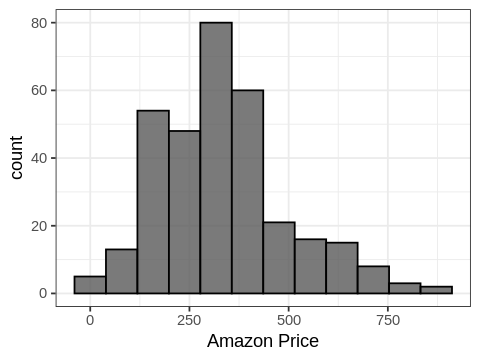

In [36]:
### (15) Your code here.
p_hist = ggplot(df) +
    geom_histogram(aes(x = pages), bins =12, alpha = 0.8, color = "black") +
    xlab("Amazon Price") +
    theme_bw()
p_hist
###

The histogram is somewhat bellshaped, but there is certainly skew in the data, with a long right tail.

**Use `ggplot` to create a scatterplot of `aprice` ($y$) against `lprice` ($x$). What do you notice about this plot?**

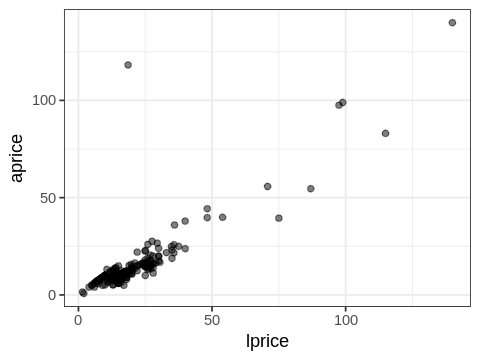

In [37]:
### (16) Your code here.
ggplot(df) +
    geom_point(aes(x = lprice, y = aprice), alpha = 0.5)+
    theme_bw()
###

The relationship between these variables looks linear, but there is at least one outlier at roughly $(20,120)$. Could that be the value that we imputed?!

**Use `ggplot` to produce a boxplot of `pages` conditioned on `cover`. Interpret this plot.**

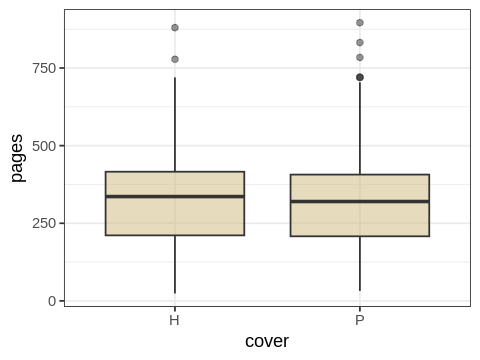

In [38]:
### (17) Your code here.
ggplot(df) +
    geom_boxplot(aes(x = cover, y = pages), alpha = 0.5, fill = "#CFB87C") +
    theme_bw()
###

The average number of pages appears to be a bit higher in hardcover books than in paperback books. These distributions are skewed a bit, with a long tail for high values of `pages`. We note that there are two potential outliers in the `Hardcover` group, and four in the `Paperback` group.